In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import plotly.express as px


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from yellowbrick.model_selection import FeatureImportances  
from tqdm import tqdm
import random
from sklearn.utils import resample

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Modelo Fedesoriano

In [2]:
df=pd.read_csv("df_export.csv")
df 

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,0,9046,Masculino,67.0,0,1,1,Empresa_Privada,228.69,36.6,Fuma ou Fumava,1,4,1,1
1,2,31112,Masculino,80.0,0,1,1,Empresa_Privada,105.92,32.5,Nunca Fumou,1,3,0,1
2,3,60182,Feminino,49.0,0,0,1,Empresa_Privada,171.23,34.4,Fuma ou Fumava,1,3,1,1
3,4,1665,Feminino,79.0,1,0,1,Autonomo,174.12,24.0,Nunca Fumou,1,3,1,0
4,5,56669,Masculino,81.0,0,0,1,Empresa_Privada,186.21,29.0,Fuma ou Fumava,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,5104,14180,Feminino,13.0,0,0,0,Criança,103.08,18.6,Nunca Fumou,0,0,0,0
4882,5106,44873,Feminino,81.0,0,0,1,Autonomo,125.20,40.0,Nunca Fumou,0,2,1,1
4883,5107,19723,Feminino,35.0,0,0,1,Autonomo,82.99,30.6,Nunca Fumou,0,1,0,1
4884,5108,37544,Masculino,51.0,0,0,1,Empresa_Privada,166.29,25.6,Fuma ou Fumava,0,1,1,0


In [3]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,9046,Masculino,67.0,0,1,1,Empresa_Privada,228.69,36.6,Fuma ou Fumava,1,4,1,1
1,31112,Masculino,80.0,0,1,1,Empresa_Privada,105.92,32.5,Nunca Fumou,1,3,0,1
2,60182,Feminino,49.0,0,0,1,Empresa_Privada,171.23,34.4,Fuma ou Fumava,1,3,1,1
3,1665,Feminino,79.0,1,0,1,Autonomo,174.12,24.0,Nunca Fumou,1,3,1,0
4,56669,Masculino,81.0,0,0,1,Empresa_Privada,186.21,29.0,Fuma ou Fumava,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,14180,Feminino,13.0,0,0,0,Criança,103.08,18.6,Nunca Fumou,0,0,0,0
4882,44873,Feminino,81.0,0,0,1,Autonomo,125.20,40.0,Nunca Fumou,0,2,1,1
4883,19723,Feminino,35.0,0,0,1,Autonomo,82.99,30.6,Nunca Fumou,0,1,0,1
4884,37544,Masculino,51.0,0,0,1,Empresa_Privada,166.29,25.6,Fuma ou Fumava,0,1,1,0


In [4]:
df['work_type'].value_counts()

Empresa_Privada        2810
Autonomo                775
Criança                 671
Funcionário_Público     630
Name: work_type, dtype: int64

### Análise Exploratória dos Dados parte 2

#### Fedesoriano

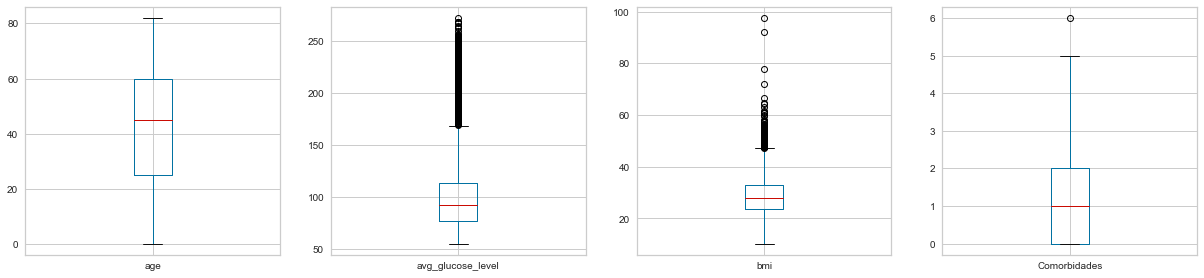

In [5]:
df_plot = df.copy()
df_plot.drop(['id', 'stroke', 'heart_disease', 'diabetes', 'hypertension', 'obesidade', 'ever_married'],axis=1, inplace=True)

ax_array = df_plot.plot(kind="box", subplots=True, figsize=(21, 21), layout=(4, 4))
plt.show()

Para preparar os dados para análise futura, deve-se aplicar técnicas de codificação, transformando todas variáveis em valores numéricos

In [6]:
df_copy= df.copy()
df_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,9046,Masculino,67.0,0,1,1,Empresa_Privada,228.69,36.6,Fuma ou Fumava,1,4,1,1
1,31112,Masculino,80.0,0,1,1,Empresa_Privada,105.92,32.5,Nunca Fumou,1,3,0,1
2,60182,Feminino,49.0,0,0,1,Empresa_Privada,171.23,34.4,Fuma ou Fumava,1,3,1,1
3,1665,Feminino,79.0,1,0,1,Autonomo,174.12,24.0,Nunca Fumou,1,3,1,0
4,56669,Masculino,81.0,0,0,1,Empresa_Privada,186.21,29.0,Fuma ou Fumava,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,14180,Feminino,13.0,0,0,0,Criança,103.08,18.6,Nunca Fumou,0,0,0,0
4882,44873,Feminino,81.0,0,0,1,Autonomo,125.20,40.0,Nunca Fumou,0,2,1,1
4883,19723,Feminino,35.0,0,0,1,Autonomo,82.99,30.6,Nunca Fumou,0,1,0,1
4884,37544,Masculino,51.0,0,0,1,Empresa_Privada,166.29,25.6,Fuma ou Fumava,0,1,1,0


#### Variáveis categóricas

In [7]:
df_copy['gender'] = df_copy['gender'].replace({'Masculino': 1, 'Feminino': 0}) #Gênero


In [8]:
df_copy['smoking_status'] = df_copy['smoking_status'].replace({'Fuma ou Fumava': 1, 'Nunca Fumou': 0}) #Fumante


In [9]:
df_copy['work_type'].value_counts()

Empresa_Privada        2810
Autonomo                775
Criança                 671
Funcionário_Público     630
Name: work_type, dtype: int64

Atributo work_type não será utilizado, conforme discutido no relatório

In [10]:
df_copy.drop(columns=['work_type', 'ever_married', 'gender'], axis=1, inplace=True)

In [11]:
df_copy['stroke'].value_counts()

0    4677
1     209
Name: stroke, dtype: int64

A grande diferença entre entre dados stroke = 1 e stroke = 0 será um impecilho para que os modelos de aprendizado de máquina obtenham boa performance. Portanto, antes de aplicar os modelos, os dados serão reamostrados de forma a obter grupos com valores iguais para derrame e não-derrame.

### Reamostragem

In [12]:
data_0 = df_copy[df_copy['stroke']==0] #dados onde stroke = 0
data_1 = df_copy[df_copy['stroke']==1] #dados onde stroke = 1


df['stroke'].value_counts()

0    4677
1     209
Name: stroke, dtype: int64

In [13]:
data_0

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
209,30669,3.0,0,0,95.12,18.0,0,0,0,0,0
210,30468,58.0,1,0,87.96,39.2,0,0,3,0,1
211,16523,8.0,0,0,110.89,17.6,0,0,0,0,0
212,56543,70.0,0,0,69.04,35.9,1,0,2,0,1
213,32257,47.0,0,0,210.95,50.1,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4881,14180,13.0,0,0,103.08,18.6,0,0,0,0,0
4882,44873,81.0,0,0,125.20,40.0,0,0,2,1,1
4883,19723,35.0,0,0,82.99,30.6,0,0,1,0,1
4884,37544,51.0,0,0,166.29,25.6,1,0,1,1,0


In [14]:
data_1

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,9046,67.0,0,1,228.69,36.6,1,1,4,1,1
1,31112,80.0,0,1,105.92,32.5,0,1,3,0,1
2,60182,49.0,0,0,171.23,34.4,1,1,3,1,1
3,1665,79.0,1,0,174.12,24.0,0,1,3,1,0
4,56669,81.0,0,0,186.21,29.0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
204,40460,68.0,1,1,247.51,40.5,1,1,5,1,1
205,17739,57.0,0,0,84.96,36.7,0,1,2,0,1
206,49669,14.0,0,0,57.93,30.9,0,1,1,0,1
207,27153,75.0,0,0,78.80,29.3,1,1,1,0,0


In [15]:
data_1 = resample(data_1,replace=True , n_samples=data_0.shape[0] , random_state=123 )
data_1

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
109,16817,78.0,1,0,130.54,20.1,0,1,3,1,0
126,46703,68.0,0,1,223.83,31.9,1,1,4,1,1
66,26727,79.0,0,0,88.92,22.9,0,1,1,0,0
98,7547,74.0,0,0,72.96,31.3,1,1,3,0,1
17,13861,52.0,1,0,233.29,48.9,0,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
93,48405,80.0,0,1,68.53,24.2,1,1,3,0,0
123,62861,78.0,0,0,67.29,24.6,0,1,1,0,0
125,58978,70.0,0,1,239.07,26.1,0,1,3,1,0
89,12062,54.0,0,0,191.82,40.4,1,1,3,1,1


In [16]:
data_1.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke', 'Comorbidades', 'diabetes',
       'obesidade'],
      dtype='object')

In [17]:
df_resampled = np.concatenate((data_0,data_1))
df_resampled = pd.DataFrame(df_resampled)
df_resampled

,0,1,2,3,4,5,6,7,8,9,10
0,30669.0,3.0,0.0,0.0,95.12,18.0,0.0,0.0,0.0,0.0,0.0
1,30468.0,58.0,1.0,0.0,87.96,39.2,0.0,0.0,3.0,0.0,1.0
2,16523.0,8.0,0.0,0.0,110.89,17.6,0.0,0.0,0.0,0.0,0.0
3,56543.0,70.0,0.0,0.0,69.04,35.9,1.0,0.0,2.0,0.0,1.0
4,32257.0,47.0,0.0,0.0,210.95,50.1,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9349,48405.0,80.0,0.0,1.0,68.53,24.2,1.0,1.0,3.0,0.0,0.0
9350,62861.0,78.0,0.0,0.0,67.29,24.6,0.0,1.0,1.0,0.0,0.0
9351,58978.0,70.0,0.0,1.0,239.07,26.1,0.0,1.0,3.0,1.0,0.0
9352,12062.0,54.0,0.0,0.0,191.82,40.4,1.0,1.0,3.0,1.0,1.0


In [19]:
df_resampled.columns = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke', 'Comorbidades', 'diabetes',
       'obesidade']

In [20]:
df_resampled

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,30669.0,3.0,0.0,0.0,95.12,18.0,0.0,0.0,0.0,0.0,0.0
1,30468.0,58.0,1.0,0.0,87.96,39.2,0.0,0.0,3.0,0.0,1.0
2,16523.0,8.0,0.0,0.0,110.89,17.6,0.0,0.0,0.0,0.0,0.0
3,56543.0,70.0,0.0,0.0,69.04,35.9,1.0,0.0,2.0,0.0,1.0
4,32257.0,47.0,0.0,0.0,210.95,50.1,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9349,48405.0,80.0,0.0,1.0,68.53,24.2,1.0,1.0,3.0,0.0,0.0
9350,62861.0,78.0,0.0,0.0,67.29,24.6,0.0,1.0,1.0,0.0,0.0
9351,58978.0,70.0,0.0,1.0,239.07,26.1,0.0,1.0,3.0,1.0,0.0
9352,12062.0,54.0,0.0,0.0,191.82,40.4,1.0,1.0,3.0,1.0,1.0


In [21]:
df_resampled['stroke'].value_counts()

0.0    4677
1.0    4677
Name: stroke, dtype: int64

Agora o dataframe encontra-se devidamente balanceado e pronto para que sejam aplicados os modelos de classificação;

## Desenvolvimento de Modelos de Aprendizado de Máquina

#### Grupos de Treino e Teste

In [22]:
X = df_resampled.drop(['stroke', 'id'], axis = 1)
Y = df_resampled['stroke']

In [23]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'Comorbidades', 'diabetes', 'obesidade'],
      dtype='object')

In [25]:
Colunas= ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'Comorbidades', 'diabetes', 'obesidade']

In [26]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [27]:
x_train, x_test, y_train, y_test= train_test_split(X_scaled,Y,test_size = .20)

In [28]:
y_train.value_counts()

0.0    3765
1.0    3718
Name: stroke, dtype: int64

In [29]:
y_test.value_counts()

1.0    959
0.0    912
Name: stroke, dtype: int64

Os valores não são exatamente iguais para infarto verdadeiro ou falso nos grupos de treino e teste entretanto, os dados ainda estão balanceados em relação à variável alvo.

#### Algoritmos de Classificação

##### Regressão Logística

Melhores Parâmetros: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Precisão no grupo de teste: 0.7846071619454837

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.79      0.76      0.77       912
         1.0       0.78      0.81      0.79       959

    accuracy                           0.78      1871
   macro avg       0.79      0.78      0.78      1871
weighted avg       0.78      0.78      0.78      1871

Precisão de cada validação cruzada: [0.77755511 0.76419506 0.78423514 0.7473262  0.77874332]
Precisão Média validação cruzada: 0.770 +/- 0.013


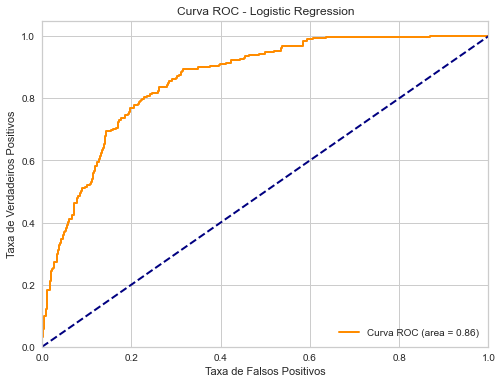

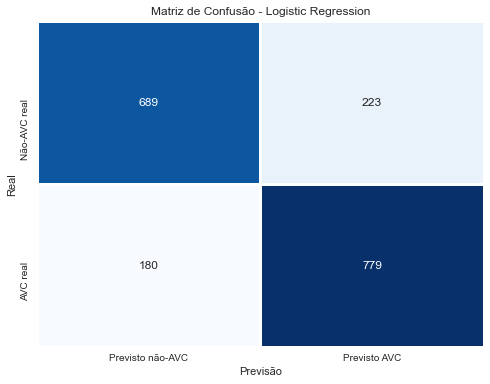

C:\Users\eduar\AppData\Roaming\Python\Python39\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


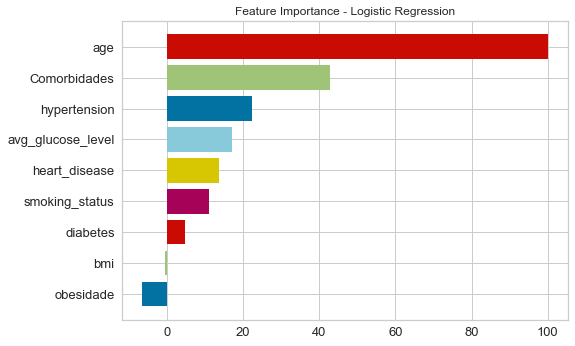

In [30]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params_lg = grid_search.best_params_
best_logistic_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_Lg = best_logistic_classifier.predict(x_test)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred_Lg)
print("Melhores Parâmetros:", best_params_lg)
print("Precisão no grupo de teste:", accuracy)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_Lg))

#Crossvalidation
scores_lr = cross_val_score(best_logistic_classifier, X=x_train, y=y_train, cv=5, n_jobs=1)
print('Precisão de cada validação cruzada: %s' % scores_lr)
print('Precisão Média validação cruzada: %.3f +/- %.3f' % (np.mean(scores_lr),np.std(scores_lr)))


#ROC curve
roc_auc = roc_auc_score(y_test, best_logistic_classifier.predict_proba(x_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, best_logistic_classifier.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_Lg = confusion_matrix(y_test, y_pred_Lg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_Lg, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Logistic Regression')
plt.xticks([0.5, 1.5], ['Previsto não-AVC', 'Previsto AVC'])
plt.yticks([0.5, 1.5], ['Não-AVC real', 'AVC real'])
plt.show()


# Plot the feature importances

fig, ax = plt.subplots()
viz = FeatureImportances(best_logistic_classifier)
viz.fit(x_train, y_train)
indices = viz.features_
y_ordered = list()
for i in indices:
    y_ordered.append(Colunas[i])

ax.set_yticklabels(y_ordered)

plt.tick_params(labelsize=13)
plt.title('Feature Importance - Logistic Regression')



plt.show()


##### Decision Tree

Melhores Parâmetros: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisão no grupo de teste: 0.9764831640833779

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.98       912
         1.0       0.96      1.00      0.98       959

    accuracy                           0.98      1871
   macro avg       0.98      0.98      0.98      1871
weighted avg       0.98      0.98      0.98      1871

Precisão de cada validação cruzada: [0.97327989 0.97127589 0.96593186 0.97393048 0.97860963]
Precisão Média validação cruzada: 0.973 +/- 0.004


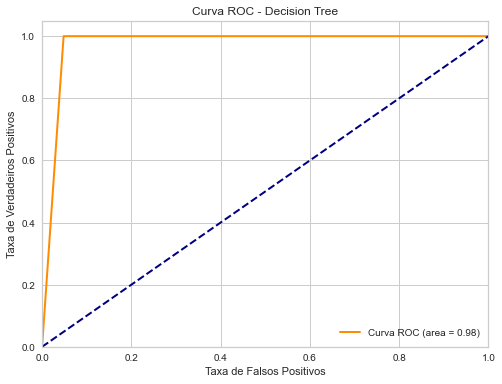

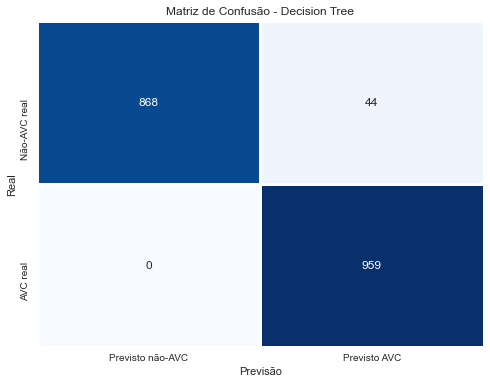

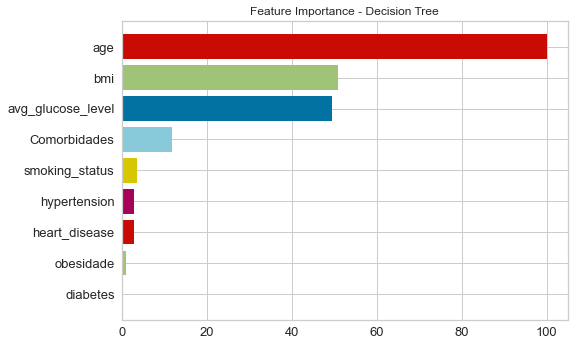

In [31]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params_dt = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_dt = best_dt_classifier.predict(x_test)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred_dt)
print("Melhores Parâmetros:", best_params_dt)
print("Precisão no grupo de teste:", accuracy)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_dt))

#Crossvalidation
scores_dt = cross_val_score(best_dt_classifier, X=x_train, y=y_train, cv=5, n_jobs=1)
print('Precisão de cada validação cruzada: %s' % scores_dt)
print('Precisão Média validação cruzada: %.3f +/- %.3f' % (np.mean(scores_dt),np.std(scores_dt)))

#ROC curve
roc_auc = roc_auc_score(y_test, best_dt_classifier.predict_proba(x_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, best_dt_classifier.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Decision Tree')
plt.xticks([0.5, 1.5], ['Previsto não-AVC', 'Previsto AVC'])
plt.yticks([0.5, 1.5], ['Não-AVC real', 'AVC real'])
plt.show()



# Plot the feature importances

fig, ax = plt.subplots()
viz1 = FeatureImportances(best_dt_classifier)
viz1.fit(x_train, y_train)
indices1 = viz1.features_
y_ordered1 = list()
for i in indices1:
    y_ordered1.append(Colunas[i])

ax.set_yticklabels(y_ordered1)

plt.tick_params(labelsize=13)
plt.title('Feature Importance - Decision Tree')



plt.show()



##### K-Nearest-Neighbors

Melhores Parâmetros: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
Precisão no grupo de teste: 0.9823623730625334

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       912
         1.0       0.97      1.00      0.98       959

    accuracy                           0.98      1871
   macro avg       0.98      0.98      0.98      1871
weighted avg       0.98      0.98      0.98      1871

Precisão de cada validação cruzada: [0.97327989 0.96593186 0.95991984 0.97593583 0.97727273]
Precisão Média validação cruzada: 0.970 +/- 0.007


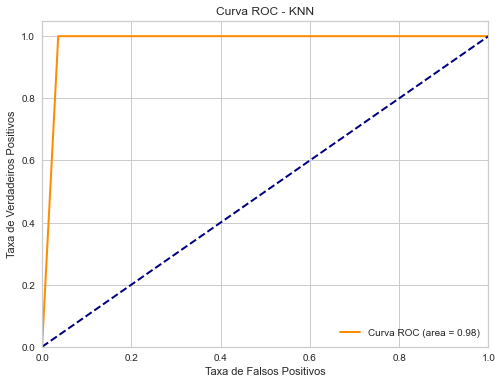

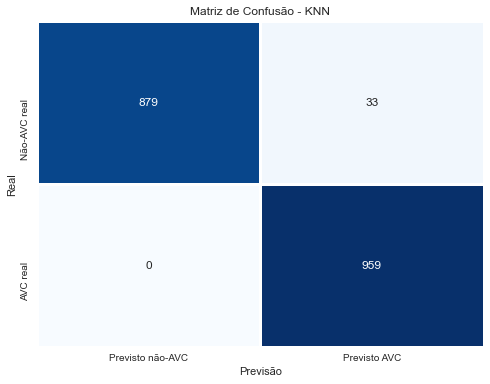

In [32]:
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create a K-Nearest Neighbors classifier
knn_classifier = KNN()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params_knn = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_knn = best_knn_classifier.predict(x_test)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred_knn)
print("Melhores Parâmetros:", best_params_knn)
print("Precisão no grupo de teste:", accuracy)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_knn))

#Crossvalidation
scores_knn = cross_val_score(best_knn_classifier, X=x_train, y=y_train, cv=5, n_jobs=1)
print('Precisão de cada validação cruzada: %s' % scores_knn)
print('Precisão Média validação cruzada: %.3f +/- %.3f' % (np.mean(scores_knn),np.std(scores_knn)))

#ROC curve
roc_auc = roc_auc_score(y_test, best_knn_classifier.predict_proba(x_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, best_knn_classifier.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - KNN')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNN')
plt.xticks([0.5, 1.5], ['Previsto não-AVC', 'Previsto AVC'])
plt.yticks([0.5, 1.5], ['Não-AVC real', 'AVC real'])
plt.show()



# Não existe Feature Importance de KNN




##### RandomForest

Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Precisão no grupo de teste: 0.9909139497594869

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       912
         1.0       0.98      1.00      0.99       959

    accuracy                           0.99      1871
   macro avg       0.99      0.99      0.99      1871
weighted avg       0.99      0.99      0.99      1871

Precisão de cada validação cruzada: [0.98597194 0.97728791 0.98396794 0.99131016 0.98796791]
Precisão Média validação cruzada: 0.985 +/- 0.005


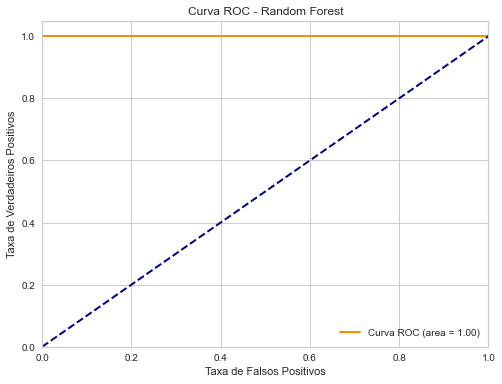

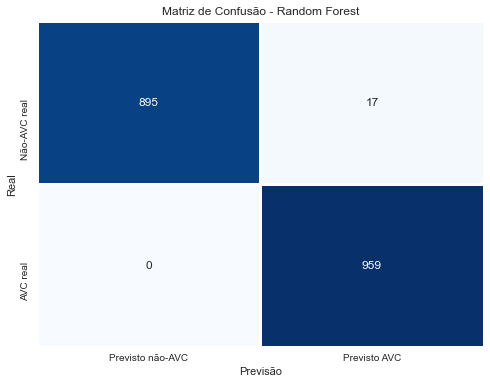

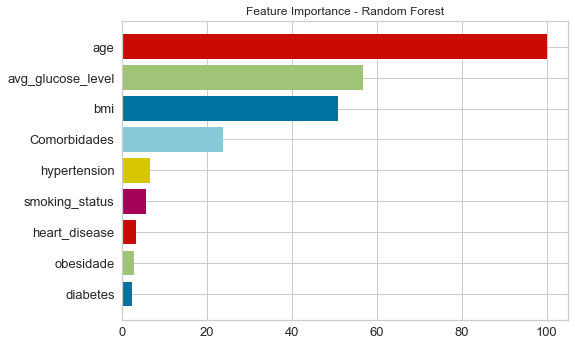

In [33]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 400, 800],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3],
}

rf_classifier = RandomForestClassifier(random_state=0)

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)

grid_search_rf.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_classifier.fit(x_train, y_train)

y_pred_rf = best_rf_classifier.predict(x_test)


# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred_rf)
print("Melhores Parâmetros:", best_params_rf)
print("Precisão no grupo de teste:", accuracy)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))

#Crossvalidation
scores_rf = cross_val_score(best_rf_classifier, X=x_train, y=y_train, cv=5, n_jobs=1)
print('Precisão de cada validação cruzada: %s' % scores_rf)
print('Precisão Média validação cruzada: %.3f +/- %.3f' % (np.mean(scores_rf),np.std(scores_rf)))

#ROC curve
roc_auc = roc_auc_score(y_test, best_rf_classifier.predict_proba(x_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, best_rf_classifier.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.xticks([0.5, 1.5], ['Previsto não-AVC', 'Previsto AVC'])
plt.yticks([0.5, 1.5], ['Não-AVC real', 'AVC real'])
plt.show()



# Plot the feature importances

fig, ax = plt.subplots()
viz2 = FeatureImportances(best_rf_classifier)
viz2.fit(x_train, y_train)
indices2 = viz2.features_
y_ordered2 = list()
for i in indices2:
    y_ordered2.append(Colunas[i])

ax.set_yticklabels(y_ordered2)

plt.tick_params(labelsize=13)
plt.title('Feature Importance - Random Forest')



plt.show()

### Teste com os dados do TEAM INCRIBO

In [34]:
df2=pd.read_csv("df_export_incribo.csv")
df2 

,Unnamed: 0,id,age,gender,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,0,18153,56,Male,0,1,Married,Autonomo,130.91,22.37,Non-smoker,Stroke,3,1,0
1,1,62749,80,Male,0,0,Single,Autonomo,183.73,32.57,Non-smoker,Stroke,3,1,1
2,4,48973,51,Male,1,1,Divorced,Autonomo,177.34,29.06,Currently Smokes,Stroke,3,1,0
3,5,29307,62,Female,0,0,Single,Empresa_Privada,91.60,37.47,Currently Smokes,Stroke,1,0,1
4,6,25525,40,Female,1,0,Married,Empresa_Privada,77.83,28.20,Currently Smokes,No Stroke,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,14994,36750,79,Female,0,1,Divorced,Empresa_Privada,82.69,36.82,Currently Smokes,No Stroke,3,0,1
11424,14995,13981,88,Female,1,1,Divorced,Autonomo,160.22,39.73,Currently Smokes,No Stroke,5,1,1
11425,14996,87707,47,Female,0,0,Married,Empresa_Privada,107.58,22.17,Non-smoker,No Stroke,0,0,0
11426,14997,33174,35,Male,0,0,Married,Funcionário_Público,134.90,26.38,Non-smoker,Stroke,1,1,0


In [35]:
df2.drop(['Unnamed: 0'],axis=1, inplace=True)
df2

,id,age,gender,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,18153,56,Male,0,1,Married,Autonomo,130.91,22.37,Non-smoker,Stroke,3,1,0
1,62749,80,Male,0,0,Single,Autonomo,183.73,32.57,Non-smoker,Stroke,3,1,1
2,48973,51,Male,1,1,Divorced,Autonomo,177.34,29.06,Currently Smokes,Stroke,3,1,0
3,29307,62,Female,0,0,Single,Empresa_Privada,91.60,37.47,Currently Smokes,Stroke,1,0,1
4,25525,40,Female,1,0,Married,Empresa_Privada,77.83,28.20,Currently Smokes,No Stroke,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,36750,79,Female,0,1,Divorced,Empresa_Privada,82.69,36.82,Currently Smokes,No Stroke,3,0,1
11424,13981,88,Female,1,1,Divorced,Autonomo,160.22,39.73,Currently Smokes,No Stroke,5,1,1
11425,87707,47,Female,0,0,Married,Empresa_Privada,107.58,22.17,Non-smoker,No Stroke,0,0,0
11426,33174,35,Male,0,0,Married,Funcionário_Público,134.90,26.38,Non-smoker,Stroke,1,1,0


In [36]:
df_copy2= df2.copy()
df_copy2

,id,age,gender,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,18153,56,Male,0,1,Married,Autonomo,130.91,22.37,Non-smoker,Stroke,3,1,0
1,62749,80,Male,0,0,Single,Autonomo,183.73,32.57,Non-smoker,Stroke,3,1,1
2,48973,51,Male,1,1,Divorced,Autonomo,177.34,29.06,Currently Smokes,Stroke,3,1,0
3,29307,62,Female,0,0,Single,Empresa_Privada,91.60,37.47,Currently Smokes,Stroke,1,0,1
4,25525,40,Female,1,0,Married,Empresa_Privada,77.83,28.20,Currently Smokes,No Stroke,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,36750,79,Female,0,1,Divorced,Empresa_Privada,82.69,36.82,Currently Smokes,No Stroke,3,0,1
11424,13981,88,Female,1,1,Divorced,Autonomo,160.22,39.73,Currently Smokes,No Stroke,5,1,1
11425,87707,47,Female,0,0,Married,Empresa_Privada,107.58,22.17,Non-smoker,No Stroke,0,0,0
11426,33174,35,Male,0,0,Married,Funcionário_Público,134.90,26.38,Non-smoker,Stroke,1,1,0


In [37]:
df_copy2['gender'] = df_copy2['gender'].replace({'Masculino': 1, 'Feminino': 0}) #Gênero

In [38]:
df_copy2['smoking_status'] = df_copy2['smoking_status'].replace({'Currently Smokes': 1, 'Non-smoker': 0, 'Formerly Smoked':1}) #Fumante

In [39]:
df_copy2['heart_disease'] = df_copy2['heart_disease'].replace({'Sim': 1, 'Não': 0}) #Doença cardíaca

In [40]:
df_copy2['hypertension'] = df_copy2['hypertension'].replace({'Sim': 1, 'Não': 0}) #Hipertensão

In [41]:
df_copy2['stroke'] = df_copy2['stroke'].replace({'Stroke': 1, 'No Stroke': 0}) #AVC

In [42]:
df_copy2['ever_married'] = df_copy2['ever_married'].replace({'Married': 1, 'Single': 0, 'Divorced':1}) #Casado alguma vez

In [43]:
df_copy2.drop(columns=['work_type', 'ever_married', 'gender'], axis=1, inplace=True)

In [44]:
df_copy2['stroke'].value_counts()

0    5725
1    5703
Name: stroke, dtype: int64

In [49]:
df_copy2

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Comorbidades,diabetes,obesidade
0,18153,56,0,1,130.91,22.37,0,1,3,1,0
1,62749,80,0,0,183.73,32.57,0,1,3,1,1
2,48973,51,1,1,177.34,29.06,1,1,3,1,0
3,29307,62,0,0,91.60,37.47,1,1,1,0,1
4,25525,40,1,0,77.83,28.20,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11423,36750,79,0,1,82.69,36.82,1,0,3,0,1
11424,13981,88,1,1,160.22,39.73,1,0,5,1,1
11425,87707,47,0,0,107.58,22.17,0,0,0,0,0
11426,33174,35,0,0,134.90,26.38,0,1,1,1,0


Base de dados balanceada, sem necessidade de reamostragem

In [45]:
X2 = df_copy2.drop(['stroke', 'id'], axis = 1)
Y2 = df_copy2['stroke']

In [46]:
X_scaled2 = scaler.fit_transform(X2)

In [47]:
x_train2, x_test2, y_train2, y_test2= train_test_split(X_scaled2,Y2,test_size = .20)

#### Modelo Treinado com Fedesoriano e testado com Incribo

Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Precisão no grupo de teste: 0.4995625546806649

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.97      0.66      1146
           1       0.47      0.03      0.06      1140

    accuracy                           0.50      2286
   macro avg       0.49      0.50      0.36      2286
weighted avg       0.49      0.50      0.36      2286

Precisão de cada validação cruzada: [0.51558229 0.50027337 0.50437637 0.51258206 0.50382932]
Precisão Média validação cruzada: 0.507 +/- 0.006


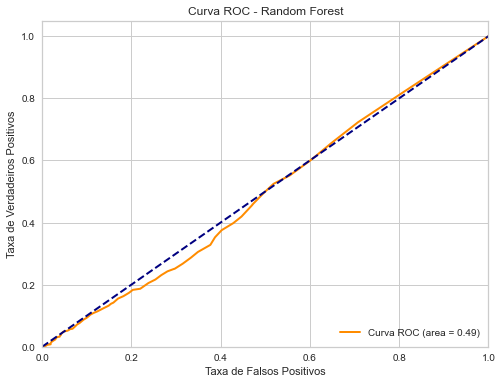

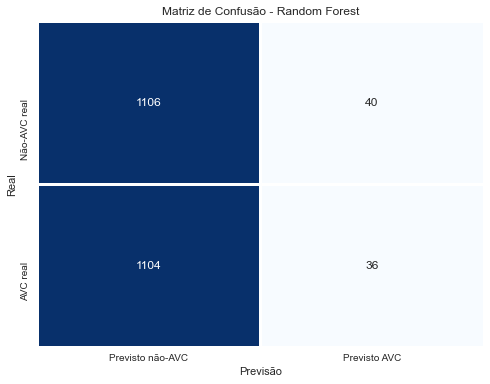

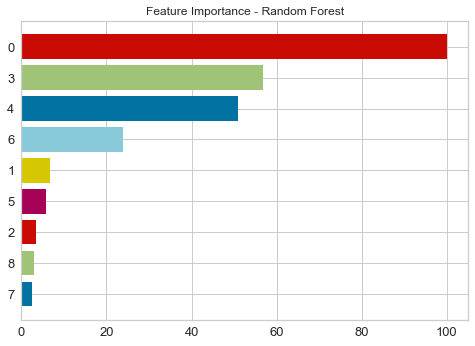

In [48]:
y_pred_rf2 = best_rf_classifier.predict(x_test2)


# Calculate accuracy and print the classification report
accuracy2 = accuracy_score(y_test2, y_pred_rf2)
print("Melhores Parâmetros:", best_params_rf)
print("Precisão no grupo de teste:", accuracy2)
print("\nRelatório de Classificação:\n", classification_report(y_test2, y_pred_rf2))

#Crossvalidation
scores_rf2 = cross_val_score(best_rf_classifier, X=x_train2, y=y_train2, cv=5, n_jobs=1)
print('Precisão de cada validação cruzada: %s' % scores_rf2)
print('Precisão Média validação cruzada: %.3f +/- %.3f' % (np.mean(scores_rf2),np.std(scores_rf2)))

#ROC curve
roc_auc2 = roc_auc_score(y_test2, best_rf_classifier.predict_proba(x_test2)[:, 1])
fpr2, tpr2, _ = roc_curve(y_test2, best_rf_classifier.predict_proba(x_test2)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_rf2 = confusion_matrix(y_test2, y_pred_rf2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf2, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.xticks([0.5, 1.5], ['Previsto não-AVC', 'Previsto AVC'])
plt.yticks([0.5, 1.5], ['Não-AVC real', 'AVC real'])
plt.show()



# Plot the feature importances

fig2, ax2 = plt.subplots()
viz_incribo = FeatureImportances(best_rf_classifier)
viz_incribo.fit(x_train2, y_train2)
indices_incribo = viz_incribo.features_
y_ordered_incribo = list()
for i in indices_incribo:
    y_ordered_incribo.append(Colunas[i])

ax.set_yticklabels(y_ordered_incribo)

plt.tick_params(labelsize=13)
plt.title('Feature Importance - Random Forest')



plt.show()